In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [76]:
data = pd.read_csv('dados_tratados.csv', sep='\t', encoding='utf-8')

In [77]:
data = data.drop('Unnamed: 0',axis=1)

In [78]:
data.shape

(4905, 29)

In [79]:
data.describe()

,UF,Situação Censitária,Acesso à Internet,Sexo,Idade,Cor/Raça,Sabe Ler/Escrever,Curso Mais Elevado,Possuí Plano de Saúde,Autoavaliação da Saúde,...,Diagnóstico de Transtorno Bipolar,Diagnóstico de TOC,Visita Médico Regularmente,Uso Medicamentos/Injeções,Acompanhamento Regular,Limitação das Atividades Diárias,Última Consulta Médica,Idade Primeiro Diagnóstico de Doença Mental,Faz Psicoterapia,Hábitos Alimentares
count,4905.000000,4905.00000,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000,...,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000
mean,32.515189,1.13945,1.141692,1.713558,44.015087,2.464220,1.061978,9.311717,1.655861,2.586748,...,1.939246,1.237309,1.782467,1.921509,2.004281,1.964118,1.594596,1.845872,1.458104,2.040775
std,10.772669,0.34645,0.348770,0.452145,15.754857,1.441913,0.241139,2.513655,0.475135,0.921395,...,0.238903,0.425477,0.412610,0.268971,1.225320,0.186014,0.455237,0.781291,0.498292,0.553766
min,11.000000,1.00000,1.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25.000000,1.00000,1.000000,1.000000,32.000000,1.000000,1.000000,7.000000,1.000000,2.000000,...,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000
50%,32.000000,1.00000,1.000000,2.000000,43.000000,2.000000,1.000000,10.000000,2.000000,3.000000,...,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.946869,2.000000,1.000000,2.000000
75%,41.000000,1.00000,1.000000,2.000000,55.000000,4.000000,1.000000,11.781742,2.000000,3.000000,...,2.000000,1.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,53.000000,2.00000,2.000000,2.000000,97.000000,5.000000,2.000000,15.000000,2.000000,5.000000,...,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,2.085417,3.000000,2.000000,3.000000


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4905 entries, 0 to 4904
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   UF                                           4905 non-null   int64  
 1   Situação Censitária                          4905 non-null   int64  
 2   Acesso à Internet                            4905 non-null   float64
 3   Sexo                                         4905 non-null   float64
 4   Idade                                        4905 non-null   float64
 5   Cor/Raça                                     4905 non-null   float64
 6   Sabe Ler/Escrever                            4905 non-null   float64
 7   Curso Mais Elevado                           4905 non-null   float64
 8   Possuí Plano de Saúde                        4905 non-null   float64
 9   Autoavaliação da Saúde                       4905 non-null   float64
 10  

In [81]:
print(data.isnull().sum())

UF                                             0
Situação Censitária                            0
Acesso à Internet                              0
Sexo                                           0
Idade                                          0
Cor/Raça                                       0
Sabe Ler/Escrever                              0
Curso Mais Elevado                             0
Possuí Plano de Saúde                          0
Autoavaliação da Saúde                         0
Diagnóstico de Hipertensão                     0
Diagnóstico de Diabetes                        0
Diagnóstico de Colesterol Alto                 0
Diagnóstico de AVC                             0
Diagnóstico de Asma                            0
Diagnóstico de Artrite/Reumatismo              0
Diagnóstico de DORT                            0
Diagnóstico de Outra Doença Mental             0
Diagnóstico de Esquizofrenia                   0
Diagnóstico de Transtorno Bipolar              0
Diagnóstico de TOC  

In [82]:
data['Diagnóstico de TOC'].value_counts()

Diagnóstico de TOC
1.0    3741
2.0    1164
Name: count, dtype: int64

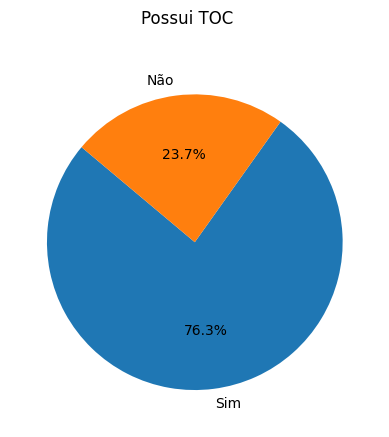

In [83]:
plt.pie(data['Diagnóstico de TOC'].value_counts(), labels=['Sim', 'Não'], autopct='%1.1f%%', startangle=140)
plt.suptitle('Possui TOC')
plt.show()

#### Verificando correlação dos dados

In [84]:
correlation_matrix = data.corr()
print(correlation_matrix)

                                                   UF  Situação Censitária  \
UF                                           1.000000            -0.083943   
Situação Censitária                         -0.083943             1.000000   
Acesso à Internet                           -0.068279             0.243154   
Sexo                                         0.006775            -0.019622   
Idade                                        0.030433            -0.012863   
Cor/Raça                                    -0.192164             0.083465   
Sabe Ler/Escrever                           -0.095580             0.103998   
Curso Mais Elevado                           0.037281            -0.206687   
Possuí Plano de Saúde                       -0.147538             0.194971   
Autoavaliação da Saúde                      -0.090161             0.104548   
Diagnóstico de Hipertensão                  -0.012691            -0.024739   
Diagnóstico de Diabetes                     -0.009497           

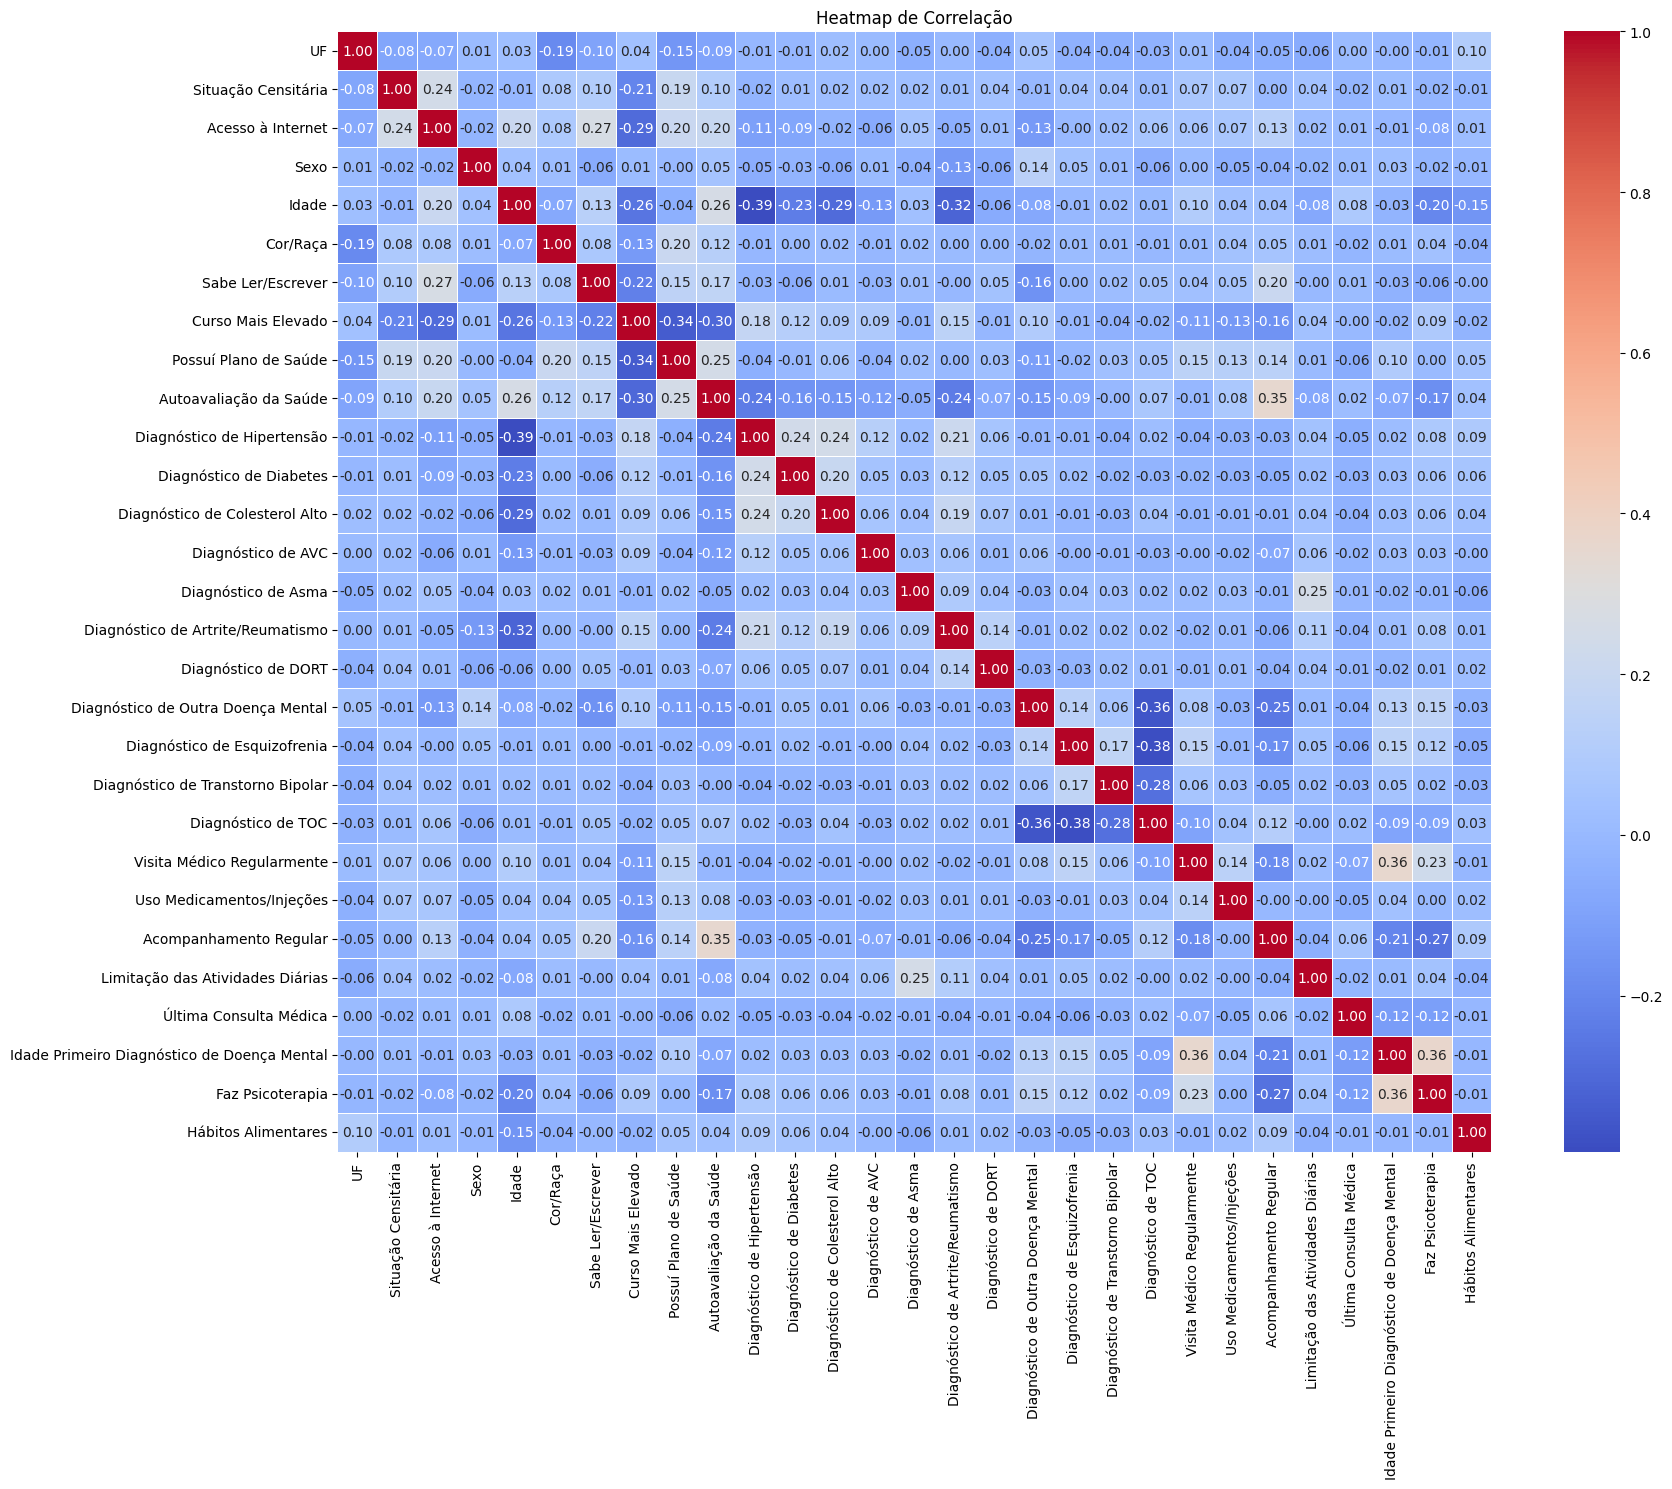

<Figure size 640x480 with 0 Axes>

In [85]:
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap de Correlação')
plt.tight_layout()
plt.show()
plt.savefig('correlation_heatmap_large.png') 

In [86]:
correlation_matrix['Diagnóstico de TOC']

UF                                            -0.033886
Situação Censitária                            0.006475
Acesso à Internet                              0.059185
Sexo                                          -0.055735
Idade                                          0.005063
Cor/Raça                                      -0.006100
Sabe Ler/Escrever                              0.045430
Curso Mais Elevado                            -0.023952
Possuí Plano de Saúde                          0.047991
Autoavaliação da Saúde                         0.073874
Diagnóstico de Hipertensão                     0.024357
Diagnóstico de Diabetes                       -0.026642
Diagnóstico de Colesterol Alto                 0.043014
Diagnóstico de AVC                            -0.027359
Diagnóstico de Asma                            0.017095
Diagnóstico de Artrite/Reumatismo              0.022542
Diagnóstico de DORT                            0.014512
Diagnóstico de Outra Doença Mental            -0

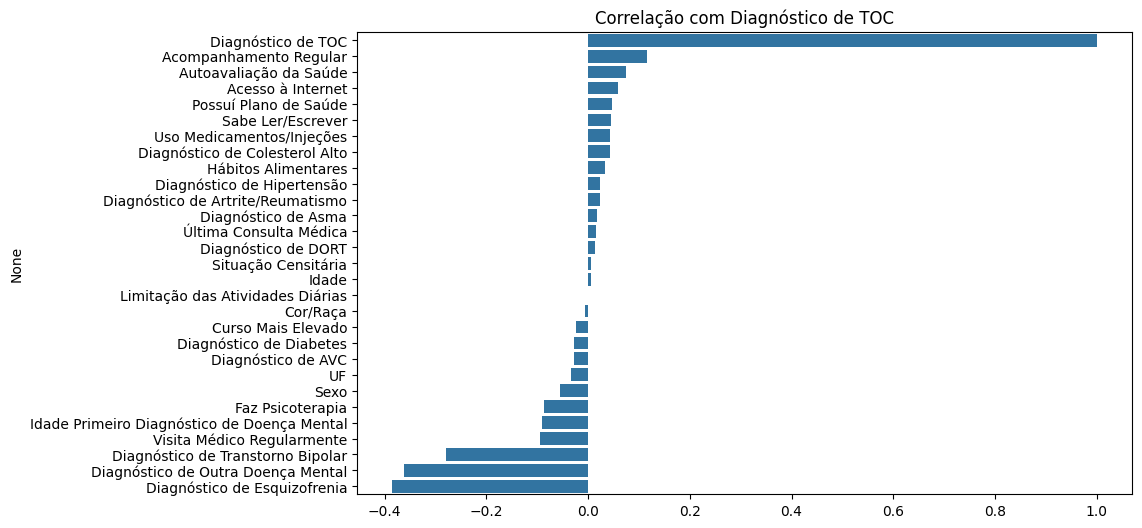

In [87]:
correlations = data.corr()['Diagnóstico de TOC'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Correlação com Diagnóstico de TOC')
plt.show()